# Classification2

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('german.data-numeric',sep ='\s+',header=None)
data.columns = ['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col14','col15','col16','col17','col18','col19','col20','col21','col22','col23','col24','col25','col26','col27','Class']
data.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col19,col20,col21,col22,col23,col24,col25,col26,col27,Class
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [ ]:
from sklearn import preprocessing

new_data = data.drop(['Class'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(new_data)
new_data_scaled = pd.DataFrame(data_scaled)
new_data_scaled.columns = ['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col14','col15','col16','col17','col18','col19','col20','col21','col22','col23','col24','col25','col26','col27']
final_data_1 = pd.concat([new_data_scaled,data['Class']],axis=1)

In [ ]:
final_data_1.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col19,col20,col21,col22,col23,col24,col25,col26,col27,Class
0,0.000000,0.029412,1.00,0.054945,1.0,1.00,0.666667,1.000000,0.000000,0.857143,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.333333,0.647059,0.50,0.318681,0.0,0.50,0.333333,0.333333,0.000000,0.053571,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
2,1.000000,0.117647,1.00,0.104396,0.0,0.75,0.666667,0.666667,0.000000,0.535714,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,0.000000,0.558824,0.50,0.423077,0.0,0.75,0.666667,1.000000,0.333333,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.000000,0.294118,0.75,0.258242,0.0,0.50,0.666667,1.000000,1.000000,0.607143,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2


In [ ]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import time

X = final_data_1.drop(['Class'],axis=1)
Y = final_data_1['Class']

In [ ]:
def knn_part_1():
    result = []

    for i in range(5):
        start = time.time()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=i)
        clf = KNeighborsClassifier(metric='minkowski', p=2)
        clf.fit(X_train, Y_train)
        Y_predTest = clf.predict(X_test)

        test_f1 = (f1_score(Y_test, Y_predTest, average='weighted'))
        time_took = time.time() - start
        result.append([test_f1,time_took])

    knn_result = pd.DataFrame(result, columns =['F-Measure','Time'])
    return knn_result

In [ ]:
from sklearn import preprocessing

new_data = data.drop(['Class'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(new_data)
new_data_scaled = pd.DataFrame(data_scaled)
new_data_scaled.columns = ['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col14','col15','col16','col17','col18','col19','col20','col21','col22','col23','col24','col25','col26','col27']

final_data_1 = pd.concat([new_data_scaled,data['Class']],axis=1)

In [ ]:
def decision_tree_part_1():
    result = []

    for i in range(5):
        start = time.time()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=i)
        clf = tree.DecisionTreeClassifier()
        clf.fit(X_train, Y_train)
        Y_predTest = clf.predict(X_test)

        time_took = time.time() - start
        test_f1= (f1_score(Y_test, Y_predTest, average='weighted'))
        result.append([test_f1,time_took])

    decision_tree_result = pd.DataFrame(result, columns =['F-Measure','Time'])
    return decision_tree_result

# Part 1

In [ ]:
knn = knn_part_1()
decision = decision_tree_part_1()

In [ ]:
knn.mean()

F-Measure    0.687940
Time         0.009725
dtype: float64

<AxesSubplot: >

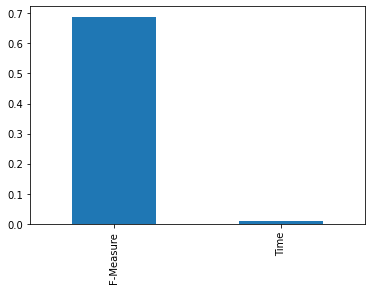

In [ ]:
knn.mean().plot(kind='bar')

In [ ]:
decision.mean()


F-Measure    0.657100
Time         0.005391
dtype: float64

<AxesSubplot: >

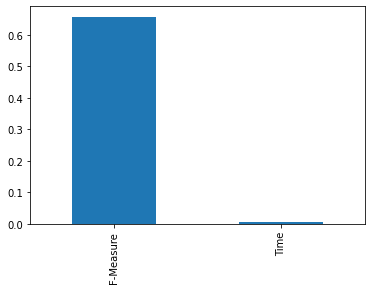

In [ ]:
decision.mean().plot(kind='bar')

In [ ]:
compare_f1 = [knn["F-Measure"], decision["F-Measure"]]
compare_time = [knn["Time"], decision["Time"]]
headers = ["KNN", "Decision Tree Classifier"]

comparison_f1 = pd.concat(compare_f1, axis=1, keys=headers)
comparison_time = pd.concat(compare_time, axis=1, keys=headers)

<AxesSubplot: title={'center': 'F1 Accuracy of KNN vs Decision Tree Classifier'}>

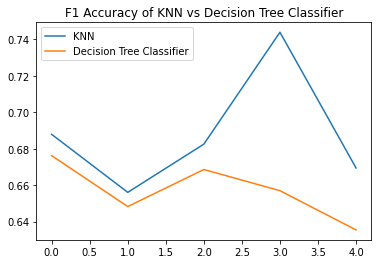

In [ ]:
comparison_f1.plot(title='F1 Accuracy of KNN vs Decision Tree Classifier')

<AxesSubplot: title={'center': 'Time of KNN vs Decision Tree Classifier'}>

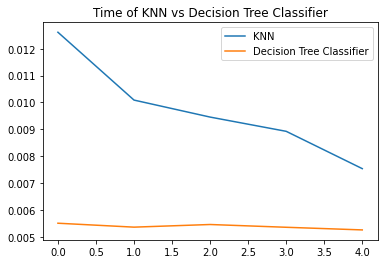

In [ ]:
comparison_time.plot(title='Time of KNN vs Decision Tree Classifier')

# Part 2

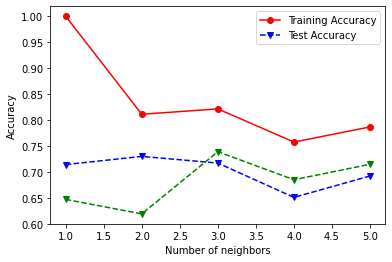

In [ ]:
#Added validAcc as per tutorial
X_rem, X_test, Y_rem, Y_test = train_test_split(X,Y,test_size=0.1)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_rem, Y_rem, test_size=0.1)

numNeighbors = [1,2,3,4,5]
trainAcc = []
testAcc = []
validAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)

    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    Y_predVal = clf.predict(X_valid)

    trainAcc.append(f1_score(Y_train, Y_predTrain, average='weighted'))
    validAcc.append(f1_score(Y_valid, Y_predVal, average='weighted'))
    testAcc.append(f1_score(Y_test, Y_predTest, average='weighted'))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--',numNeighbors, validAcc,'gv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

knnValidationAccuracy = pd.DataFrame(validAcc, columns=['Validation Accuracy'])

In this graph we can see when k is 4 is the most accurate depth as per validation accuracy. (Also shown in the table below).

In [ ]:
knnValidationAccuracy

,Validation Accuracy
0,0.646906
1,0.618862
2,0.738809
3,0.684748
4,0.714559


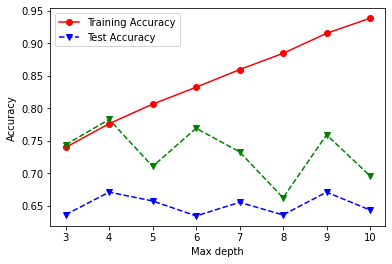

In [ ]:
maxdepths = [3,4,5,6,7,8,9,10]

trainAcc2 = np.zeros(len(maxdepths))
testAcc2 = np.zeros(len(maxdepths))
validAcc2 = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf2 = tree.DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train, Y_train)

    Y_predVal2 = clf2.predict(X_valid)
    Y_predTrain2 = clf2.predict(X_train)
    Y_predTest2 = clf2.predict(X_test)

    trainAcc2[index] = (f1_score(Y_train, Y_predTrain2, average='weighted'))
    testAcc2[index] = (f1_score(Y_test, Y_predTest2, average='weighted'))
    validAcc2[index] = (f1_score(Y_valid, Y_predVal2, average='weighted'))

    index += 1

plt.plot(maxdepths,trainAcc2,'ro-',maxdepths,testAcc2,'bv--',maxdepths, validAcc2,'gv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

decisionValidationAccuracy = pd.DataFrame(validAcc2, columns=['Validation Accuracy'])


In this graph we can see when the dept value is 9TH it is the most accurate based on the validation accuracy

In [ ]:
decisionValidationAccuracy

,Validation Accuracy
0,0.743613
1,0.782769
2,0.710359
3,0.769073
4,0.732735
5,0.662085
6,0.758979
7,0.695826


In [ ]:
compare = [knnValidationAccuracy['Validation Accuracy'], decisionValidationAccuracy['Validation Accuracy']]
headers = ["KNN", "Decision Tree Classifier"]

compare = pd.concat(compare, axis=1, keys=headers)
compare

,KNN,Decision Tree Classifier
0,0.646906,0.743613
1,0.618862,0.782769
2,0.738809,0.710359
3,0.684748,0.769073
4,0.714559,0.732735
5,NaN,0.662085
6,NaN,0.758979
7,NaN,0.695826


<AxesSubplot: >

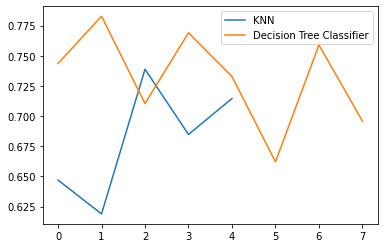

In [ ]:
compare.plot()

From the following output we can see KNN is less accurate than the desciion tree clasiffy which average around mid 70's comapared to low 70's for KNN.